In [25]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure



In [26]:
driver1 = "VER"
driver2 = "PER"

year = 2024
race = 'Austin'

In [27]:
# Setup plotting
ff1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')
# Enable the cache
ff1.Cache.enable_cache('/Users/will/Library/Caches/fastf1')
session = ff1.get_session(year, race, 'R')

session.load()


core           INFO 	Loading data for United States Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 

In [33]:
d1_fast = session.laps.pick_drivers(driver1).pick_fastest()
d2_fast = session.laps.pick_drivers(driver2).pick_fastest()
d1_data = d1_fast.get_car_data()
d2_data = d2_fast.get_car_data()

telemetry_d1 = d1_fast.get_car_data().add_distance()
telemetry_d2 = d2_fast.get_car_data().add_distance()

In [34]:
telemetry_d1

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-10-20 20:14:36.135,11335,221,5,100,False,0,car,0 days 00:00:00.147000,0 days 02:07:58.537000,9.024167
1,2024-10-20 20:14:36.375,11554,227,5,100,False,0,car,0 days 00:00:00.387000,0 days 02:07:58.777000,24.157500
2,2024-10-20 20:14:36.535,11879,229,5,100,False,0,car,0 days 00:00:00.547000,0 days 02:07:58.937000,34.335278
3,2024-10-20 20:14:36.735,10759,233,5,100,False,0,car,0 days 00:00:00.747000,0 days 02:07:59.137000,47.279722
4,2024-10-20 20:14:36.935,10747,240,6,100,False,0,car,0 days 00:00:00.947000,0 days 02:07:59.337000,60.613056
...,...,...,...,...,...,...,...,...,...,...,...
373,2024-10-20 20:16:13.175,11452,189,4,100,False,0,car,0 days 00:01:37.187000,0 days 02:09:35.577000,5397.763889
374,2024-10-20 20:16:13.335,11732,192,4,100,False,0,car,0 days 00:01:37.347000,0 days 02:09:35.737000,5406.297222
375,2024-10-20 20:16:13.535,10896,202,4,100,False,0,car,0 days 00:01:37.547000,0 days 02:09:35.937000,5417.519444
376,2024-10-20 20:16:13.855,10848,211,5,100,False,0,car,0 days 00:01:37.867000,0 days 02:09:36.257000,5436.275000


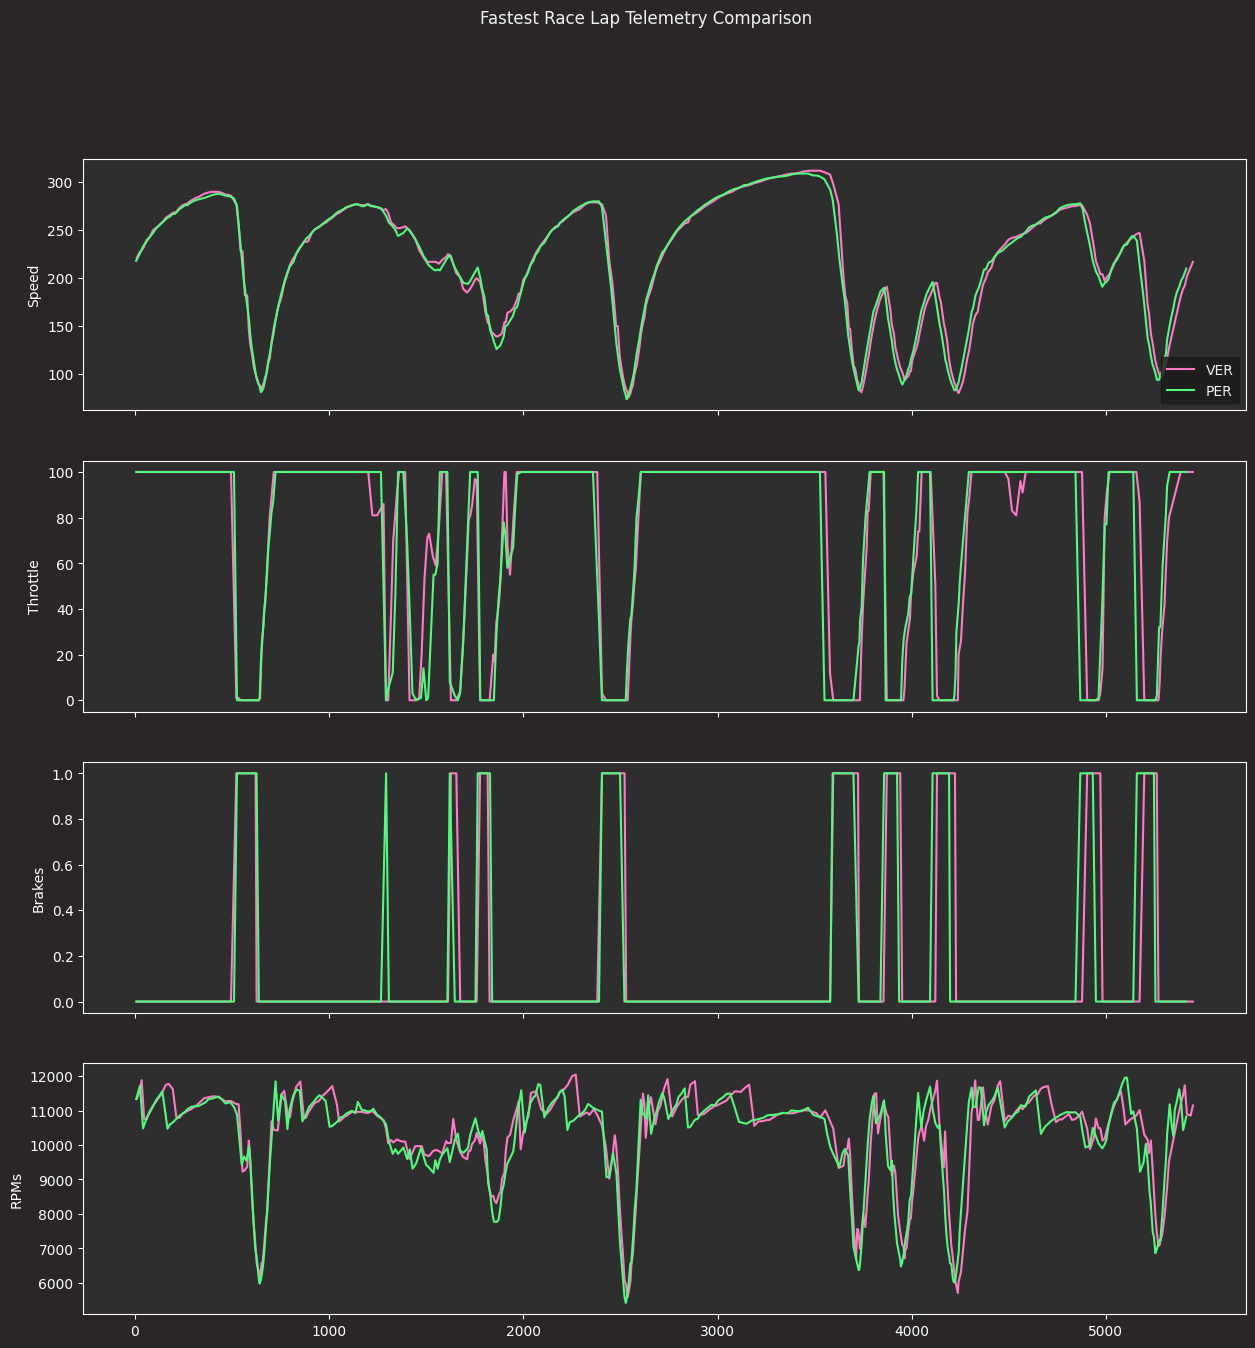

In [36]:
fig, ax = plt.subplots(4)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["axes.facecolor"] = (
    "#2e2e2e"  # Set background color to lighter dark grey
)
plt.rcParams["axes.edgecolor"] = "white"  # Set edge color to white
plt.rcParams["axes.labelcolor"] = "white"  # Set label color to white
plt.rcParams["xtick.color"] = "white"  # Set x-tick color to white
plt.rcParams["ytick.color"] = "white"  # Set y-tick color to white
plt.rcParams["grid.color"] = "gray"  # Set grid color to gray

ax[0].plot(telemetry_bot['Distance'], telemetry_d1['Speed'], label=driver1)
ax[0].plot(telemetry_ham['Distance'], telemetry_d2['Speed'], label=driver2)
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")
ax[1].plot(telemetry_bot['Distance'], telemetry_d1['Throttle'], label=driver1)
ax[1].plot(telemetry_ham['Distance'], telemetry_d2['Throttle'], label=driver2)
ax[1].set(ylabel='Throttle')
ax[2].plot(telemetry_bot['Distance'], telemetry_d1['Brake'], label=driver1)
ax[2].plot(telemetry_ham['Distance'], telemetry_d2['Brake'], label=driver2)
ax[2].set(ylabel='Brakes')

ax[3].plot(telemetry_bot['Distance'], telemetry_d1['RPM'], label=driver1)
ax[3].plot(telemetry_ham['Distance'], telemetry_d2['RPM'], label=driver2)
ax[3].set(ylabel='RPMs')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.show()